In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

In [3]:
import cv2
from IPython.display import HTML, FileLink
from os import listdir
from os.path import isfile, join, isdir

# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

# For downloading files
from IPython.display import FileLink, FileLinks

In [4]:
PATH = "data/btc/"
SOURCE = f'{PATH}btcgraphs/'
DESTINATION = f'{PATH}btcgraphs_cropped/'

In [5]:
all_files = []
new_files = []
for fld in ['1', '1.5']:
    for st in ['train', 'test', 'valid']:
        if fld == '1.5' and st == 'test':
            continue
        for cls in ['UP', 'DOWN']:
            new_dir = join(DESTINATION, st, cls)
            current_dir = join(SOURCE, fld, st, cls)
            for f in listdir(current_dir):
                if isfile(join(current_dir, f)):
                    all_files.append(join(current_dir, f))
                    new_files.append(join(new_dir, f))

In [6]:
print(len(all_files))
print(len(new_files))

1008310
1008310


In [7]:
print(all_files[0:3])

['data/btc/btcgraphs/1/train/UP/53f6d751-0825-44bb-95a7-01d8a0514f31.png', 'data/btc/btcgraphs/1/train/UP/8340d84d-d0f2-417c-ba3e-5b2c51c01906.png', 'data/btc/btcgraphs/1/train/UP/a4cf9430-e538-4840-9709-475e063735e3.png']


In [8]:
print(new_files[0:3])

['data/btc/btcgraphs_cropped/train/UP/53f6d751-0825-44bb-95a7-01d8a0514f31.png', 'data/btc/btcgraphs_cropped/train/UP/8340d84d-d0f2-417c-ba3e-5b2c51c01906.png', 'data/btc/btcgraphs_cropped/train/UP/a4cf9430-e538-4840-9709-475e063735e3.png']


In [9]:
FileLink(all_files[0])

/home/liam/crypto-project/fast-crypto-ai/data/btc/btcgraphs/1/train/UP/53f6d751-0825-44bb-95a7-01d8a0514f31.png

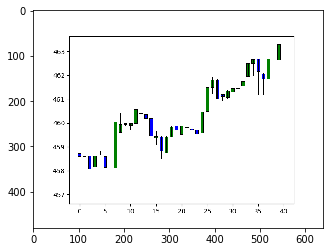

In [10]:
img = cv2.imread(all_files[0])
plt.imshow(img)

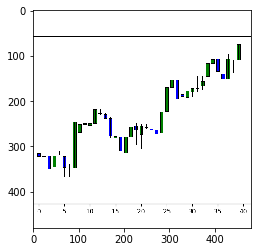

In [11]:
crop_img = img[0:480, 90:90+480]
plt.imshow(crop_img)

In [14]:
i = 0
for f in log_progress(all_files, every=10):
    img = cv2.imread(f)
    crop_img = img[0:480, 90:90+480]
    cv2.imwrite(new_files[i], crop_img)
    i += 1

    

VBox(children=(HTML(value=''), IntProgress(value=0, max=1008310)))